# IDEB

Learning Outcomes:
Please note this is not the assessment task. The task to be completed is detailed on the next page. This CA will assess student attainment of the following minimum intended learning outcomes:
1. Critically evaluate and implement appropriate clustering algorithms and interpret and document their results. (Linked to PLO 1, PLO 5)
2. Apply modelling to time series data to facilitate business intelligence needs (Linked to PLO 1, PLO 2, PLO 3)

Assessment Task
Students are advised to review and adhere to the submission requirements documented after the assessment task.
This is an individual project using the PYTHON programming language. Develop and deploy machine learning models in any one of the following areas only and analyse the results.
– Education or Sports
– Public Transport
– Stock market dataset from only website: https://finance.yahoo.com/quote/CSV/history/
The dataset should have a decent number of rows and columns (for example, type of variables may be categorical, continuous, and discrete) after cleaning to justify the use of the machine learning modelling approach. The type of question(s) that you should formulate for the project will depend on the chosen domain of the dataset.
Project questions could be: (this is a small, suggested, sample of questions, other questions may be more appropriate to your project)
– How to measure similarity or dissimilarity between different clusters?
– Which clustering solution do you prefer, and why?
– How to analyse and investigate an inflation rate for a specific product?
You will present their findings and defend the results in the report (MS Doc). Your report should capture the following aspects that are relevant to your project investigations.
i) A precise introduction, motivation, description of problem domain, project objectives and the rationale for the chosen dataset in the above-mentioned areas.
(15 marks)
ii) Which clustering algorithms would you consider for segmentation, and why? Explain the differences between silhouette score and Davies-Bouldin index in the context of clustering. Compare the results
obtained from any two clustering algorithms from the chosen dataset.
(35 marks)
iii) What insights can you derive from the initial exploration of the time series data based on the provided topics? Describe any trends, seasonality, or anomalies observed. How did you determine the appropriate parameters (p, d, q) for the ARIMA model. Evaluate the performance of the ARIMA model in forecasting future values, highlighting any strengths and limitations based on your chosen
dataset.
(35 marks)
iv) Interpret and justify the results based on the problem specification or project objectives by using suitable visualizations. Comments and description of Python code, conclusions of the project should be specified in the report as well as jupyter notebook. Citations and references should be in the
Harvard Style.
Note: You can choose two different datasets for task (ii) or task (iii) separately or one dataset for both tasks
(15 marks)

### Libraries

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

from sklearn_extra.cluster import KMedoids

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

import plotly.express as px

import itertools

from matplotlib import gridspec 

from sklearn.cluster import OPTICS, cluster_optics_dbscan 

from fcmeans import FCM

from sklearn.datasets import make_blobs

from seaborn import scatterplot as scatter

from sklearn.metrics import davies_bouldin_score


### EDA

In [2]:
saeb = pd.read_csv("ideb.csv")

In [3]:
saeb.head(1)

Localidade   Rede Taxa de Aprovação - 2015 Taxa de Aprovação - 2017  \
0  Estado São Paulo  Total                     0,98                     0,98   

  Taxa de Aprovação - 2019 SAEB - 2015 SAEB - 2017 SAEB - 2019 IDEB 2015  \
0                     0,98        6,54        6,77        6,83       6,4   

  IDEB 2017 IDEB 2019 Meta - 2015 Meta - 2017 Meta - 2019 Meta - 2021  \
0       6,6       6,7         6,0         6,3         6,5         6,7   

           Anos  Cod  
0  1º ao 5º ano  NaN

In [4]:
saeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Localidade                4372 non-null   object 
 1   Rede                      4372 non-null   object 
 2   Taxa de Aprovação - 2015  2794 non-null   object 
 3   Taxa de Aprovação - 2017  4171 non-null   object 
 4   Taxa de Aprovação - 2019  4123 non-null   object 
 5   SAEB - 2015               2734 non-null   object 
 6   SAEB - 2017               4106 non-null   object 
 7   SAEB - 2019               3918 non-null   object 
 8   IDEB 2015                 2734 non-null   object 
 9   IDEB 2017                 4106 non-null   object 
 10  IDEB 2019                 3918 non-null   object 
 11  Meta - 2015               2986 non-null   object 
 12  Meta - 2017               2991 non-null   object 
 13  Meta - 2019               4298 non-null   object 
 14  Meta - 2

In [5]:
saeb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                           11
dtype: int64

In [6]:
isnull = saeb.isnull().sum()

nperc = pd.DataFrame((isnull / (len(saeb))) * 100)

nperc.columns = ["% of NaN"]

nperc.head()

% of NaN
Localidade                 0.000000
Rede                       0.000000
Taxa de Aprovação - 2015  36.093321
Taxa de Aprovação - 2017   4.597438
Taxa de Aprovação - 2019   5.695334

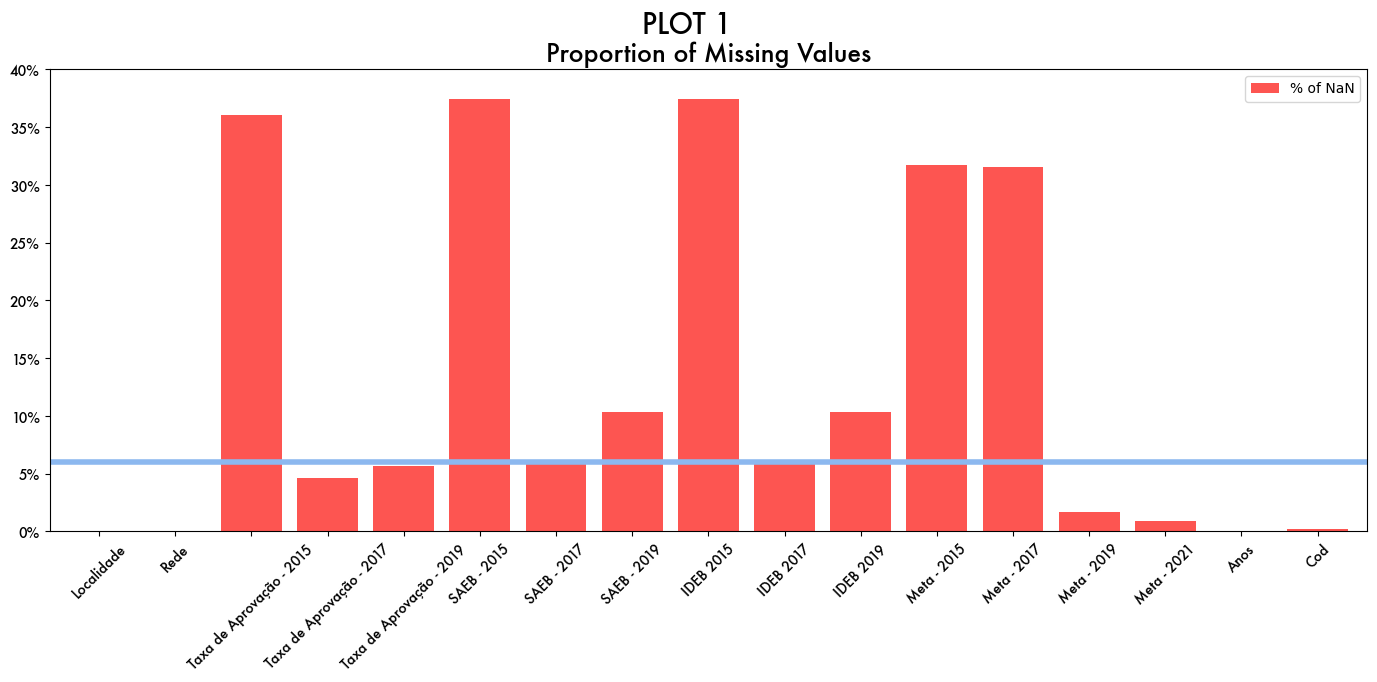

In [7]:
nperc.plot(kind = "bar", color = "#FD5551", figsize = (17,6),
          width = 0.8, linestyle = "-")

plt.axhline(y = 6, linewidth = 4, color = "#8CB8EF", 
           linestyle = "-")


plt.suptitle("PLOT 1", font = "Futura", fontsize = 20)
plt.title("Proportion of Missing Values", font = "Futura", fontsize = 18)

plt.yticks(ticks = plt.yticks()[0], labels=[f"{int(tick)}%" for tick in plt.yticks()[0]], font = "Futura")
plt.xticks(rotation = 45, font = "Futura");

miss_vals = ["na"]

ideb = pd.read_csv("ideb.csv", na_values = miss_vals)

In [8]:
saeb = saeb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_4327/3086521940.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  saeb = saeb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)


In [9]:
saeb = saeb.drop(saeb.index[:11])


saeb.reset_index(drop = True, inplace = True)
saeb.head(2)

Localidade       Rede Taxa de Aprovação - 2015 Taxa de Aprovação - 2017  \
0  Adamantina  Municipal                     0.99                     0.99   
1  Adamantina    Pública                     0.99                     0.99   

  Taxa de Aprovação - 2019 SAEB - 2015 SAEB - 2017 SAEB - 2019 IDEB 2015  \
0                     0.98        6.71        6.94        6.93       6.6   
1                     0.98        6.71        6.94        6.93       6.6   

  IDEB 2017 IDEB 2019 Meta - 2015 Meta - 2017 Meta - 2019 Meta - 2021  \
0       6.9       6.8         6.2         6.4         6.6         6.8   
1       6.9       6.8         6.2         6.4         6.6         6.8   

           Anos        Cod  
0  1º ao 5º ano  3500105.0  
1  1º ao 5º ano  3500105.0

In [10]:
saeb["Rede"].unique()

array(['Municipal', 'Pública', 'Estadual', 'Federal'], dtype=object)

In [11]:
saeb.tail(2)

Localidade      Rede Taxa de Aprovação - 2015  \
4359  Estiva Gerbi  Estadual                      NaN   
4360  Estiva Gerbi   Pública                      NaN   

     Taxa de Aprovação - 2017 Taxa de Aprovação - 2019 SAEB - 2015  \
4359                     0.96                     0.99         NaN   
4360                     0.96                     0.99         NaN   

     SAEB - 2017 SAEB - 2019 IDEB 2015 IDEB 2017 IDEB 2019 Meta - 2015  \
4359        4.47         NaN       NaN       4.3       NaN         NaN   
4360        4.47         NaN       NaN       4.3       NaN         NaN   

     Meta - 2017 Meta - 2019 Meta - 2021          Anos        Cod  
4359         NaN         4.5         4.7  Ensino médio  3557303.0  
4360         NaN         4.5         4.7  Ensino médio  3557303.0

In [12]:
saeb["Rede"].value_counts()

Rede
Pública      1934
Estadual     1469
Municipal     927
Federal        31
Name: count, dtype: int64

<Axes: xlabel='Rede'>

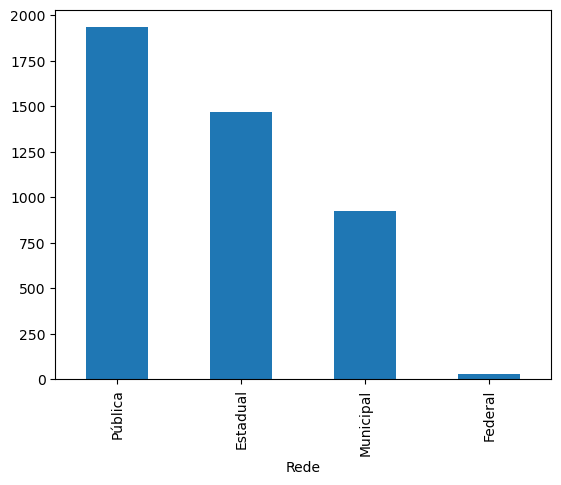

In [13]:
saeb["Rede"].value_counts().plot(kind = "bar")

In [14]:
saeb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                            0
dtype: int64

In [15]:
saeb["rede_b"] = saeb["Rede"].map(lambda x: 0 if x == "Estadual" else (1 if x == "Municipal" else 2))

In [16]:
saeb["rede_b"].unique()

array([1, 2, 0])

In [17]:
saeb["rede_b"].value_counts()

rede_b
2    1965
0    1469
1     927
Name: count, dtype: int64

ideb_17 = ideb[["rede_b", "IDEB 2017"]]

### Filtering Dataset

I am going to use data from 2017 which is the year with the least amount of missing values.

In [18]:
saeb_17 = saeb.loc[saeb["rede_b"] != 2, ["rede_b", "IDEB 2017", 
                                        "Taxa de Aprovação - 2017",
                                        "SAEB - 2017"]]

In [19]:
saeb_17.head(3)

rede_b IDEB 2017 Taxa de Aprovação - 2017 SAEB - 2017
0       1       6.9                     0.99        6.94
2       1       6.5                     0.95        6.85
4       0       7.0                     1.00        7.01

In [20]:
saeb_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 0 to 4359
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rede_b                    2396 non-null   int64 
 1   IDEB 2017                 2156 non-null   object
 2   Taxa de Aprovação - 2017  2214 non-null   object
 3   SAEB - 2017               2156 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.6+ KB


In [21]:
saeb_17["rede_b"].value_counts()

rede_b
0    1469
1     927
Name: count, dtype: int64

In [22]:
saeb_17.isnull().sum()

rede_b                        0
IDEB 2017                   240
Taxa de Aprovação - 2017    182
SAEB - 2017                 240
dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SAEB - 2017', ylabel='Count'>

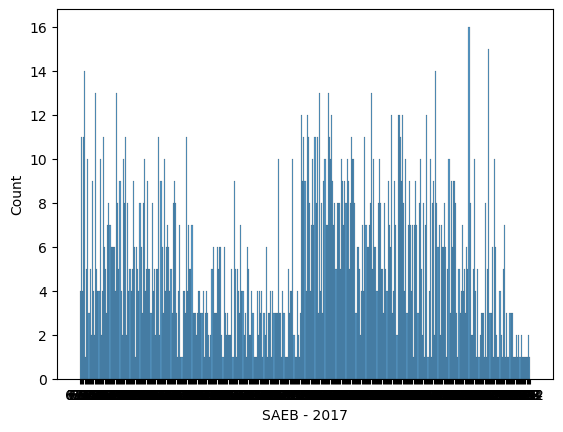

In [23]:
sns.histplot(data = saeb_17, x = "SAEB - 2017")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Taxa de Aprovação - 2017', ylabel='Count'>

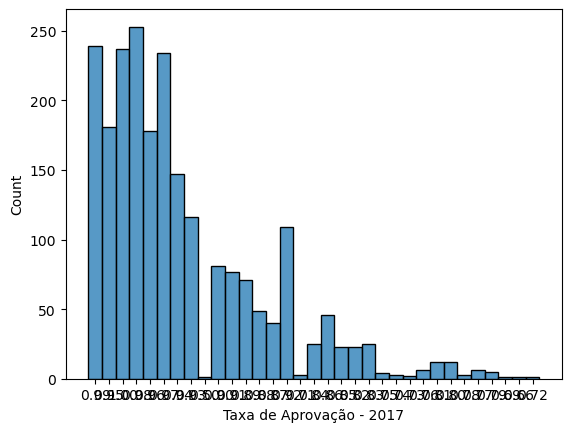

In [24]:
sns.histplot(data = saeb_17, x = "Taxa de Aprovação - 2017")

### Splitting the Dataset

y = ideb_17["rede_b"].values

X = ideb_17.iloc[:, [1, 2, 3]].values

### Missing Values

The imputation using the median was the first option considered due to its simplicity and for being less sensitive to outliers than the other summary statistics (Kumar, 2021). However, the dataset has a complexity that requires a more sophisticated approach. The KNN Imputer was chosen for the following reasons (Firdose):
- capturing relationships between variables;
- preserving the structure and patterns present in the data;
- and for its non-parametric approach which does not make assumptions about the data distribution.

The trade-off will be the computational complexity and the sensitive to outliers. The second one will be dealt with the l2 Normalisation (Htoon, 2020).

In [25]:
saeb_17.head(1)

rede_b IDEB 2017 Taxa de Aprovação - 2017 SAEB - 2017
0       1       6.9                     0.99        6.94

In [26]:
imputer = KNNImputer(n_neighbors = 5)
saeb_17 = imputer.fit_transform(saeb_17)

In [27]:
saeb_17

array([[1.  , 6.9 , 0.99, 6.94],
       [1.  , 6.5 , 0.95, 6.85],
       [0.  , 7.  , 1.  , 7.01],
       ...,
       [0.  , 4.3 , 0.95, 4.49],
       [0.  , 3.2 , 0.88, 3.62],
       [0.  , 4.3 , 0.96, 4.47]])

In [28]:
saeb_17 = pd.DataFrame(saeb_17)

In [29]:
saeb_17.tail()

0    1     2     3
2391  0.0  4.2  0.92  4.57
2392  0.0  4.0  0.89  4.48
2393  0.0  4.3  0.95  4.49
2394  0.0  3.2  0.88  3.62
2395  0.0  4.3  0.96  4.47

In [30]:
saeb_17.columns = ["Rede", "IDEB", "Tx Aprovacao", "SAEB"]

In [31]:
saeb_17.tail()

Rede  IDEB  Tx Aprovacao  SAEB
2391   0.0   4.2          0.92  4.57
2392   0.0   4.0          0.89  4.48
2393   0.0   4.3          0.95  4.49
2394   0.0   3.2          0.88  3.62
2395   0.0   4.3          0.96  4.47

Text(0.5, 1, 'PLOT 2: Scatterplot: Approval and Quality Rate by type os School')

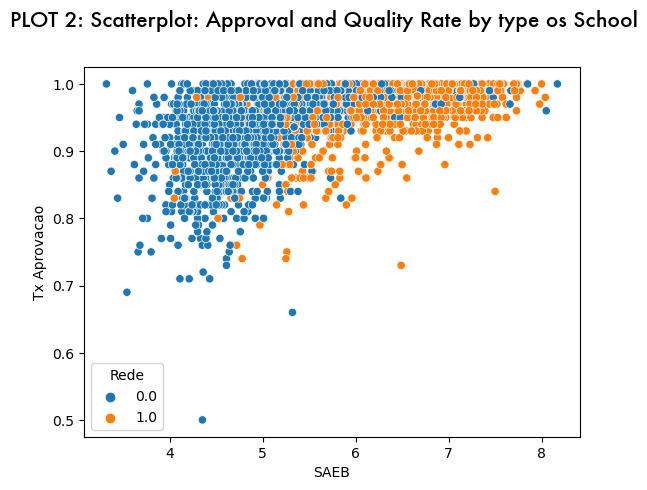

In [85]:
sns.scatterplot(data = saeb_17, x = "SAEB", y = "Tx Aprovacao",
               hue = "Rede")

plt.suptitle("PLOT 2: Scatterplot: Approval and Quality Rate by type os School", font = "Futura", fontsize = 15
             , y = 1)
#plt.title("Scatterplot: Approval and Quality Rate by type os School", font = "Futura", fontsize = 15)

### Standardise

In [33]:
scaler = StandardScaler()

In [34]:
saeb_17[["IDEB_T", "Tx Aprovacao_T", "SAEB_T" ]] = scaler.fit_transform(
saeb_17[["IDEB", "Tx Aprovacao", "SAEB" ]])

In [35]:
saeb_17.tail()

Rede  IDEB  Tx Aprovacao  SAEB    IDEB_T  Tx Aprovacao_T    SAEB_T
2391   0.0   4.2          0.92  4.57 -0.956400       -0.445380 -0.989576
2392   0.0   4.0          0.89  4.48 -1.141384       -1.033958 -1.082726
2393   0.0   4.3          0.95  4.49 -0.863907        0.143198 -1.072376
2394   0.0   3.2          0.88  3.62 -1.881323       -1.230150 -1.972822
2395   0.0   4.3          0.96  4.47 -0.863907        0.339390 -1.093076

# K-means Clustering

Citation: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

### Elbow Plot

In [36]:
def optimise (data, max_k):
    means = []
    inertia = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(data)
        
        means.append(k)
        inertia.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (12, 6))
    plt.plot(means, inertia, "*-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.suptitle("PLOT 3", font = "Futura", fontsize = 20)
    plt.title("Elbow Method", font = "Futura", fontsize = 15)
    plt.grid(True)
    plt.show()
    

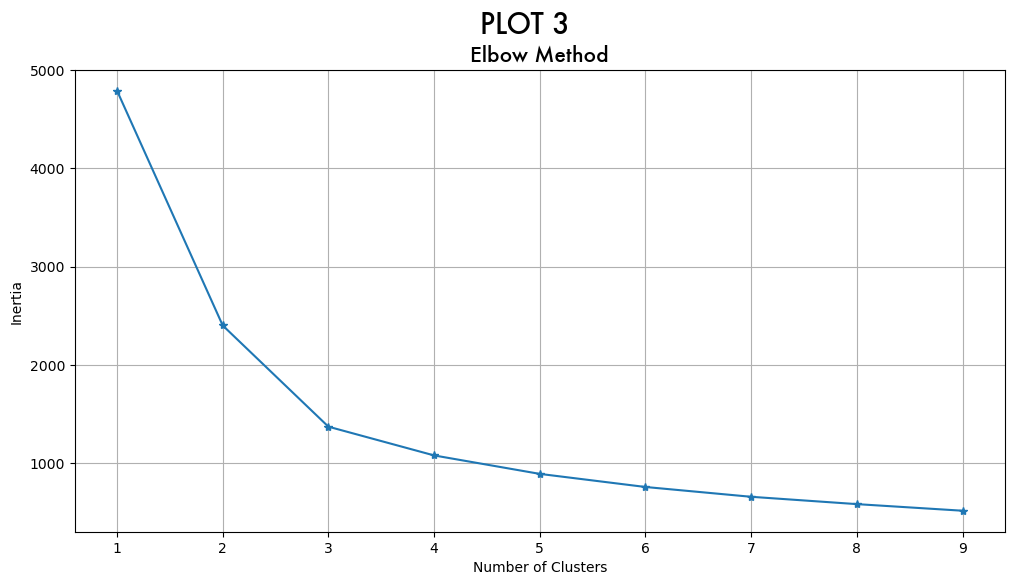

In [37]:
optimise(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], 10)

### Applying K-Means

In [38]:
kmeans = KMeans(n_clusters = 3)

In [39]:
kmeans.fit(saeb_17[["SAEB_T", "Tx Aprovacao_T"]])

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
saeb_17["kmeans_3"] = kmeans.labels_

In [41]:
saeb_17.tail()

Rede  IDEB  Tx Aprovacao  SAEB    IDEB_T  Tx Aprovacao_T    SAEB_T  \
2391   0.0   4.2          0.92  4.57 -0.956400       -0.445380 -0.989576   
2392   0.0   4.0          0.89  4.48 -1.141384       -1.033958 -1.082726   
2393   0.0   4.3          0.95  4.49 -0.863907        0.143198 -1.072376   
2394   0.0   3.2          0.88  3.62 -1.881323       -1.230150 -1.972822   
2395   0.0   4.3          0.96  4.47 -0.863907        0.339390 -1.093076   

      kmeans_3  
2391         0  
2392         2  
2393         0  
2394         2  
2395         0

In [42]:
saeb_17.describe()

Rede         IDEB  Tx Aprovacao         SAEB       IDEB_T  \
count  2396.000000  2396.000000   2396.000000  2396.000000  2396.000000   
mean      0.386895     5.234032      0.942701     5.526117     0.000000   
std       0.487141     1.081397      0.050981     0.966390     1.000209   
min       0.000000     2.400000      0.500000     3.320000    -2.621261   
25%       0.000000     4.400000      0.920000     4.750000    -0.771415   
50%       0.000000     5.000000      0.950000     5.338000    -0.216461   
75%       1.000000     6.200000      0.980000     6.370000     0.893446   
max       1.000000     8.200000      1.000000     8.170000     2.743292   

       Tx Aprovacao_T        SAEB_T     kmeans_3  
count    2.396000e+03  2.396000e+03  2396.000000  
mean     4.009406e-15 -1.897944e-16     0.706594  
std      1.000209e+00  1.000209e+00     0.753208  
min     -8.685466e+00 -2.283321e+00     0.000000  
25%     -4.453800e-01 -8.032773e-01     0.000000  
50%      1.431976e-01 -1.947001e-01     1.000000  
75%      7.317752e-01  8.734151e-01     1.000000  
max      1.124160e+00  2.736407e+00     2.000000

### Plotting the Results

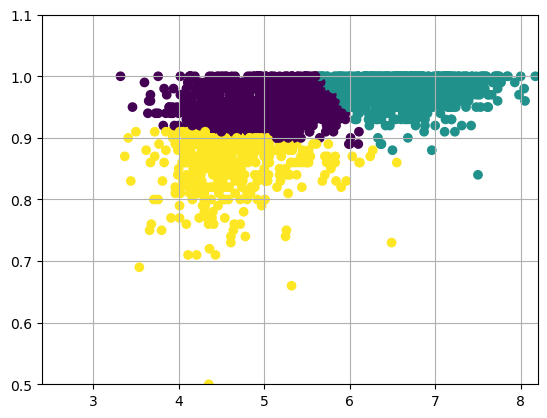

In [43]:
plt.scatter(x = saeb_17["SAEB"], y = saeb_17["Tx Aprovacao"], 
           c = saeb_17["kmeans_3"])
plt.xlim(2.4 , 8.2)
plt.ylim(0.5, 1.1)
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


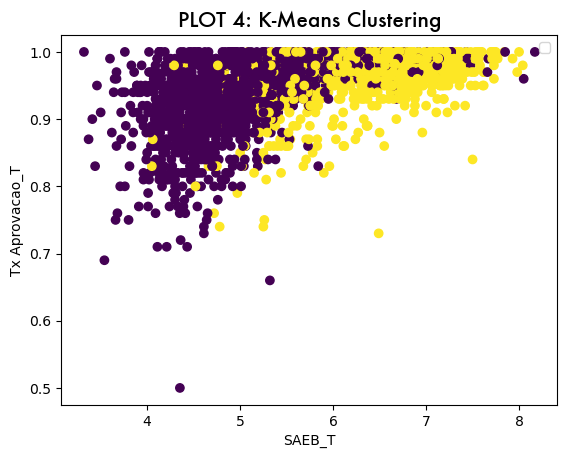

In [44]:
plt.scatter(x = saeb_17["SAEB"], y = saeb_17["Tx Aprovacao"], 
           c = saeb_17["Rede"])
#plt.xlim(2.4 , 8.2)
#plt.ylim(0.5, 1.1)
#plt.grid(True)
plt.title("PLOT 4: K-Means Clustering", font = "Futura", fontsize = 15)
plt.xlabel("SAEB_T")
plt.ylabel("Tx Aprovacao_T")
plt.legend()
plt.show()
plt.show()

In [45]:
silhouette_avg = ss(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.47217962402008495


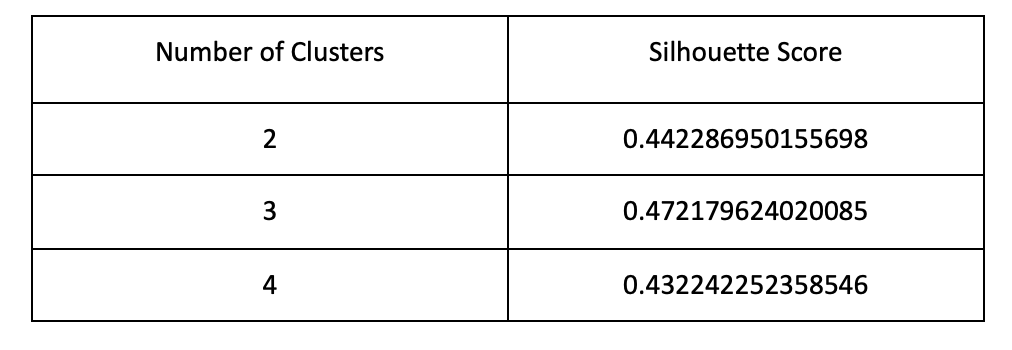

In [46]:
davies_bouldin_index = davies_bouldin_score(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], kmeans.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.7548333004997786


04 clusters Davies-Bouldin Index: 0.8300654093086033

03 clusters Davies-Bouldin Index: 0.7549475972310069

02 clusters Davies-Bouldin Index: 0.816091499379918

### IDEB and Tx de Aprovacao

In [47]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(saeb_17[["SAEB_T", "Tx Aprovacao_T"]])
    saeb_17[f'KMeans{k}'] = kmeans.labels_

Text(0.5, 0.98, 'FIGURE 1: K-Means with 1, 2 and 3 Clusters')

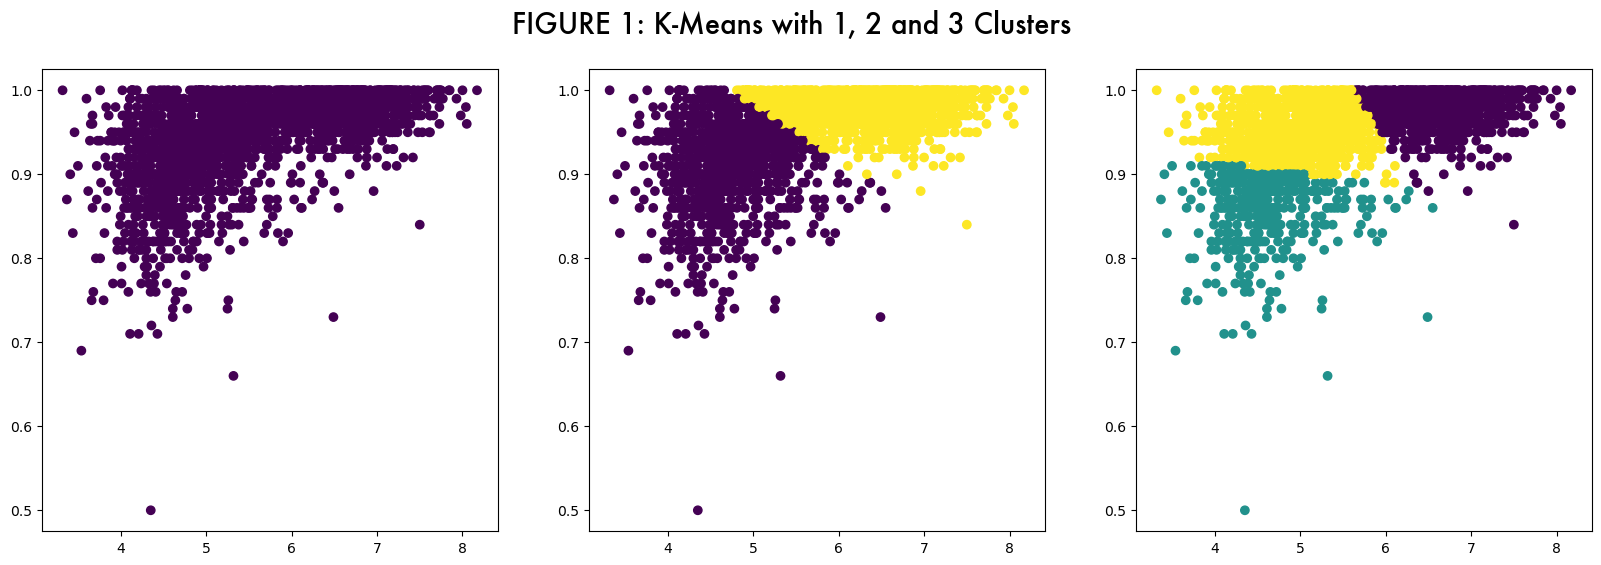

In [48]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = saeb_17["SAEB"], y = saeb_17["Tx Aprovacao"], 
              c = saeb_17[f'KMeans{i}'])
    
plt.suptitle("FIGURE 1: K-Means with 1, 2 and 3 Clusters", font = "Futura", fontsize = 20)
#plt.title("K-Means with 1, 2 and 3 Clusters", font = "Futura", fontsize = 15)

# K Medoids

https://www.youtube.com/watch?v=8PSbi6GKXrs

In [49]:
#! pip install scikit-learn-extra

kmedoids = KMedoids(n_clusters = 2, random_state = 12)
kmedoids.fit(ideb_17[["IDEB_T", "Tx Aprovacao_T"]])

km_labels = kmedoids.labels_

medoids = kmedoids.medoid_indices_

print("Cluster Labels:", km_labels)
print("Cluster Medoids:", medoids)

In [50]:
kmedoids = KMedoids(n_clusters = 2, random_state = 12)
kmedoids.fit(saeb_17[["SAEB_T", "Tx Aprovacao_T"]])

km_labels = kmedoids.labels_

medoids = kmedoids.medoid_indices_

print("Cluster Labels:", km_labels)
print("Cluster Medoids:", medoids)


Cluster Labels: [1 1 1 ... 0 0 0]
Cluster Medoids: [1511  147]


In [51]:
saeb_17["KMedoids"] = km_labels

In [52]:
saeb_17["KMedoids"].value_counts()

KMedoids
0    1509
1     887
Name: count, dtype: int64

In [53]:
saeb_17.groupby("KMedoids").median()

Rede  IDEB  Tx Aprovacao  SAEB    IDEB_T  Tx Aprovacao_T    SAEB_T  \
KMedoids                                                                       
0          0.0   4.6         0.936  4.93 -0.586431       -0.131472 -0.616978   
1          1.0   6.5         0.980  6.63  1.170923        0.731775  1.142514   

          kmeans_3  KMeans1  KMeans2  KMeans3  
KMedoids                                       
0              0.0      0.0      0.0      2.0  
1              1.0      0.0      1.0      0.0

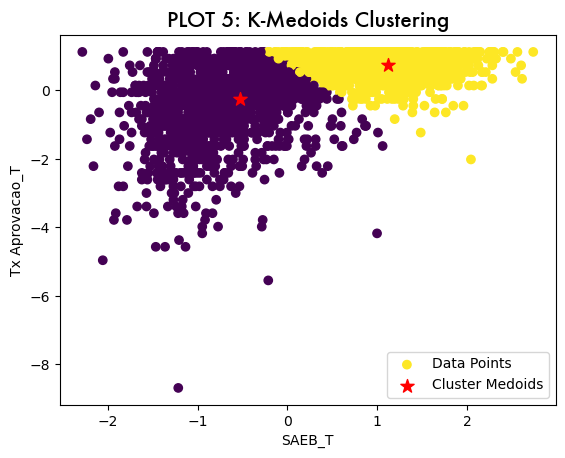

In [54]:
def assign_labels(data, medoid_indices):
    labels = np.zeros(len(data))
    for i, point in enumerate(data):
        labels[i] = np.argmin(np.linalg.norm(point - data[medoid_indices], axis = 1))
    return labels.astype(int)

km_labels = assign_labels(saeb_17[["SAEB_T", "Tx Aprovacao_T"]].values, medoids)

plt.scatter(saeb_17["SAEB_T"], saeb_17["Tx Aprovacao_T"], c = km_labels, cmap = 'viridis', 
            label = 'Data Points')

plt.scatter(saeb_17["SAEB_T"].iloc[medoids], saeb_17["Tx Aprovacao_T"].iloc[medoids], 
            marker = "*", s = 100, c = 'red', label = 'Cluster Medoids')

plt.title("PLOT 5: K-Medoids Clustering", font = "Futura", fontsize = 15)
plt.xlabel("SAEB_T")
plt.ylabel("Tx Aprovacao_T")
plt.legend()
plt.show()

In [55]:
silhouette_avg = ss(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], km_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.45929437589950434


3 CLUSTERS Silhouette Score: 0.44983446784705194

2 clusters Silhouette Score: 0.45929437589950434

4 clusters Silhouette Score: 0.39444352551840334

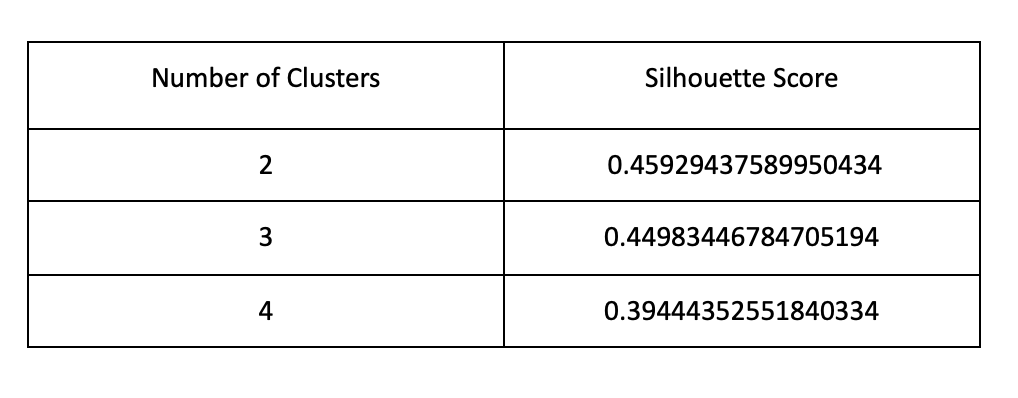

In [56]:
davies_bouldin_index = davies_bouldin_score(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], km_labels)
print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.7538285487793357


02 clusters Davies-Bouldin Index: 0.7538285487793357

03 clusters Davies-Bouldin Index: 0.8090572600304085

04 clusters Davies-Bouldin Index: 0.855939439014425

# Hierarchical Agglomerative

https://www.youtube.com/watch?v=lQt92mh0N8I

### IDEB X TX Aprovacao

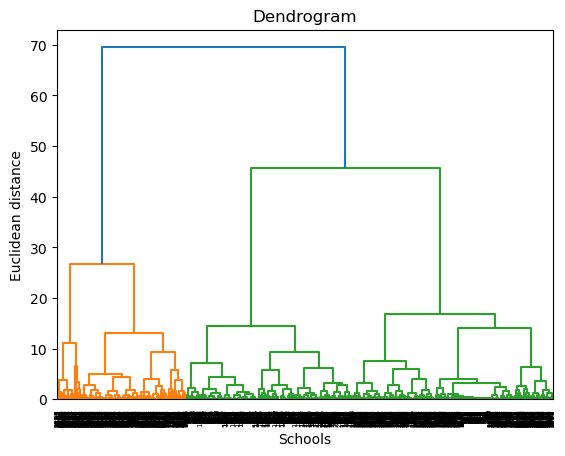

In [57]:
dendrogrm = sch.dendrogram(sch.linkage(saeb_17[["IDEB_T", "Tx Aprovacao_T"]], method = "ward"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

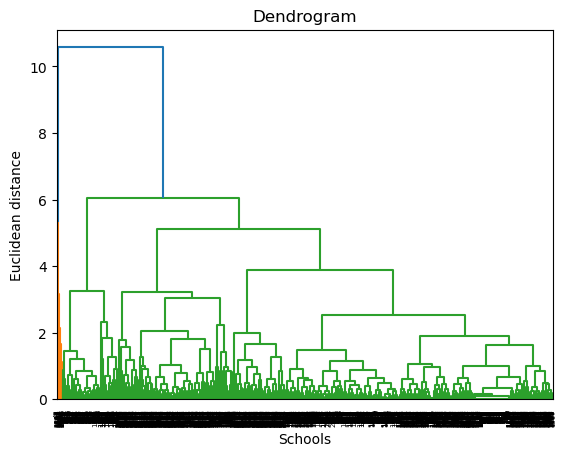

In [58]:
dendrogrm = sch.dendrogram(sch.linkage(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], method = "complete"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

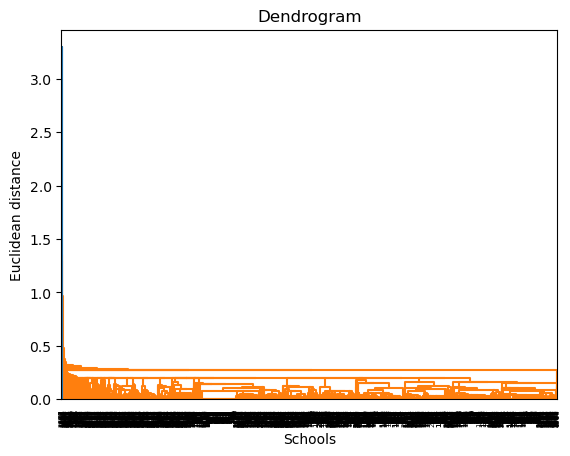

In [59]:
dendrogrm = sch.dendrogram(sch.linkage(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], method = "single"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


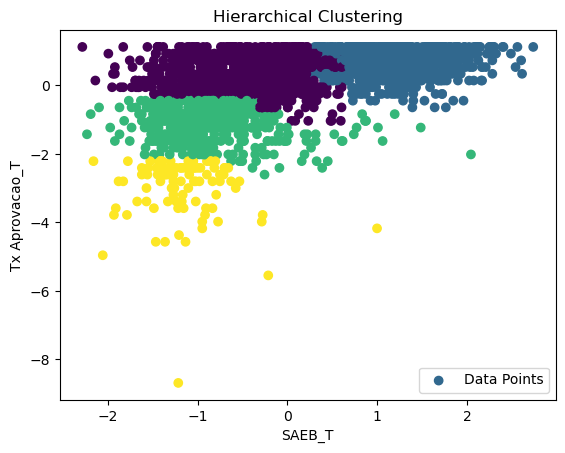

In [60]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
hc.fit(saeb_17[["SAEB_T", "Tx Aprovacao_T"]])

cluster_labels = hc.labels_

plt.scatter(saeb_17["SAEB_T"], saeb_17["Tx Aprovacao_T"], 
            c = cluster_labels, cmap = 'viridis', label = 'Data Points')

plt.title('Hierarchical Clustering')
plt.xlabel("SAEB_T")
plt.ylabel("Tx Aprovacao_T")
plt.legend()
plt.show()

In [61]:
silhouette_avg = ss(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], hc.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4289568429062376


3 clusters Silhouette Score: 0.44527699825919975

2 clusters Silhouette Score: 0.4430726579976028

4 clusters Silhouette Score: 0.4289568429062376

In [62]:
davies_bouldin_index = davies_bouldin_score(saeb_17[["SAEB_T", "Tx Aprovacao_T"]], hc.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.7985610679325326


02 clusters Davies-Bouldin Index: 0.7307035770828494

03 clusters Davies-Bouldin Index: 0.8028149690234697

04 clusters Davies-Bouldin Index: 0.7985610679325326

# DBSCAN

In [63]:


# Create the DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to your data
dbscan.fit(saeb_17[["Tx Aprovacao_T", "SAEB_T"]])

# Get the cluster labels
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 6


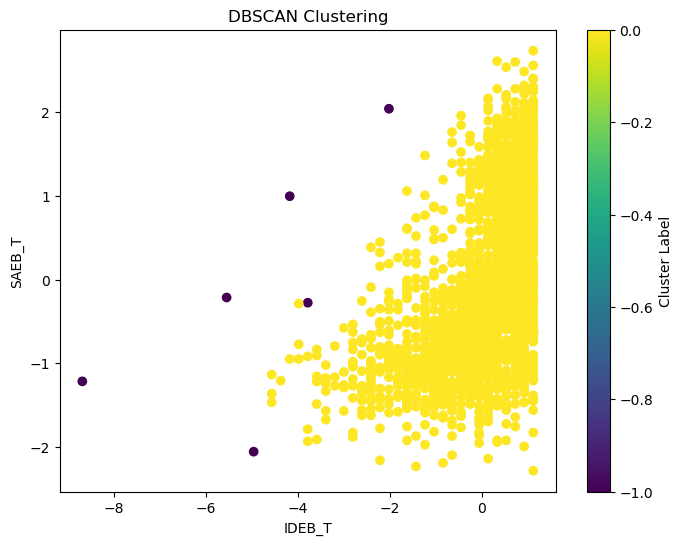

In [64]:
import matplotlib.pyplot as plt

# Extract coordinates of the clusters
x = saeb_17["Tx Aprovacao_T"]
y = saeb_17["SAEB_T"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=cluster_labels, cmap='viridis')
plt.xlabel('IDEB_T')
plt.ylabel('SAEB_T')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


https://www.youtube.com/watch?v=VO_uzCU_nKw

https://colab.research.google.com/drive/1DphvjpgQXwBWQq08dMyoSc6UREzXLxSE?usp=sharing#scrollTo=ibVVoe4cSR1h

In [65]:
X = saeb_17[["Tx Aprovacao_T", "SAEB_T"]]
print(X)

      Tx Aprovacao_T    SAEB_T
0           0.927968  1.463362
1           0.143198  1.370213
2           1.124160  1.535812
3           0.143198  0.956215
4           0.731775  1.163214
...              ...       ...
2391       -0.445380 -0.989576
2392       -1.033958 -1.082726
2393        0.143198 -1.072376
2394       -1.230150 -1.972822
2395        0.339390 -1.093076

[2396 rows x 2 columns]


In [66]:
dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

DBSCAN()

In [67]:
dbscan_cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
saeb_17["dbscan"] = dbscan_cluster_model.labels_

In [69]:
saeb_17.tail(1)

Rede  IDEB  Tx Aprovacao  SAEB    IDEB_T  Tx Aprovacao_T    SAEB_T  \
2395   0.0   4.3          0.96  4.47 -0.863907         0.33939 -1.093076   

      kmeans_3  KMeans1  KMeans2  KMeans3  KMedoids  dbscan  
2395         0        0        0        2         0       0

In [70]:
saeb_17["dbscan"].value_counts()

dbscan
 0    2390
-1       6
Name: count, dtype: int64

So, my model only has one cluster and the -1 is all the noise, the outliers

In [71]:
fig = px.scatter(x = saeb_17["Tx Aprovacao_T"], y = saeb_17["SAEB_T"], 
                color = saeb_17["dbscan"])

fig.show()

the yellows dots are one cluster and the blue ones are the noise

In [72]:
ss(X, saeb_17["dbscan"])

0.6593044902403237

In [73]:
epsilons = np.linspace(0.01, 1, num = 15)

min_samples = np.arange(2, 20, step = 3)

In [74]:
combinations = list(itertools.product(epsilons, min_samples))

In [75]:
N = len(combinations)
N

90

def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

best_dict

## Optics

In [76]:
# Initialise clust object by calling OPTICS()
clust = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)

# Run the fit method to train the data
clust.fit(saeb_17)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:992: RuntimeWarning:

divide by zero encountered in divide



OPTICS(min_cluster_size=0.05, min_samples=10)

In [77]:
# Set eps = 0.5
labels_050 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 0.5)

# Set eps = 2
labels_200 = cluster_optics_dbscan(reachability = clust.reachability_,
                                   core_distances = clust.core_distances_,
                                   ordering = clust.ordering_, eps = 2)

In [78]:
# Declare an object named as 'space'
space = np.arange(len(saeb_17))

# Set the reachability distance 
reachability = clust.reachability_[clust.ordering_]

# Store the labels
labels = clust.labels_[clust.ordering_]

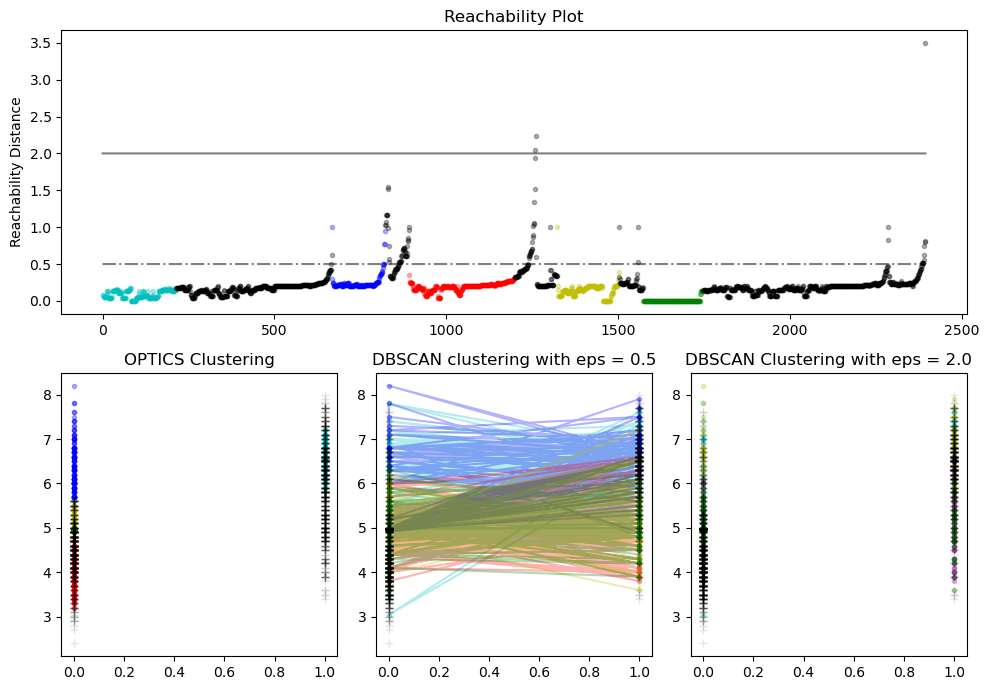

In [79]:
# Defining the framework of the visualization 
plt.figure(figsize = (10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 

for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = saeb_17[clust.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(saeb_17.iloc[clust.labels_ == -1, 0], 
        saeb_17.iloc[clust.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = saeb_17[labels == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(saeb_17.iloc[labels == -1, 0], 
        saeb_17.iloc[labels == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = saeb_17.iloc[labels == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(saeb_17.iloc[labels == -1, 0], 
        saeb_17.iloc[labels == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 

plt.tight_layout() 
plt.show() 

## Fuzzy C-Means 

https://www.youtube.com/watch?v=WOUMZatSiLM

https://colab.research.google.com/drive/1yU3fsjaSqhGxK7fthtvWZ7KOV-94kAS_#scrollTo=878040cb

In [80]:
ideb_a = np.array(saeb_17[["SAEB_T", "Tx Aprovacao_T"]])

In [81]:
K=3
m=3

U=np.random.rand(ideb_a.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.54218824, 0.37196104, 0.08585072],
       [0.54559583, 0.41452238, 0.03988179],
       [0.2956376 , 0.05413384, 0.65022855],
       ...,
       [0.53517705, 0.42475821, 0.04006475],
       [0.11768086, 0.55928397, 0.32303517],
       [0.40517476, 0.23976858, 0.35505667]])

In [82]:
def calculate_centroid (ideb_a, K, U, m):
    Centroids=np.zeros((K,ideb_a.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*ideb_a, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [83]:
def calculate_membership (ideb_a, Centroids, K , m):
    U_new = np.zeros((ideb_a.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(ideb_a-Centroids[i,:],axis=1)

    U_new = 1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [84]:
labels=np.argmax(U_new, axis=1)
labels

NameError: name 'U_new' is not defined

In [ ]:
sns.scatterplot(data=ideb_a, x=ideb_a[:,0],y=ideb_a[:,1], hue=labels, palette='nipy_spectral')

In [ ]:
max_iteration=100
for iteration in range (max_iteration):
    Centroids=calculate_centroid(ideb_a, 5, U , 3)
    U_new= calculate_membership (ideb_a,Centroids, 5 , 3 )
    
    
    
    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new
    
    labels=np.argmax(U_new, axis=1)

In [ ]:
sns.scatterplot(data=ideb_a, x=ideb_a[:,0],y=ideb_a[:,1], hue=labels, palette='nipy_spectral')

## Class

In [ ]:
# Initialise an object fcm by calling a method FCM
fcm = FCM(n_clusters = 3)

# fit the fuzzy-c-means
fcm.fit(ideb_a)

# outputs are stored fcm_centers and fcm_labels
fcm_centers = fcm.centers

# argmax: Returns the indices of the maximum values along an axis.
fcm_labels = fcm.u.argmax(axis = 1)

In [ ]:
print(fcm_centers, fcm_labels)

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0].scatter(ideb_a[:,0], ideb_a[:,1], c = y)
axes[1].scatter(ideb_a[:,0], ideb_a[:,1], c = fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker = "s", s = 100)

axes[0].set_xlabel("IDEB")
axes[0].set_ylabel("Tx Aprovacao")
axes[1].set_xlabel("IDEB")
axes[1].set_ylabel("Tx Aprovacao")
axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

In [ ]:
#pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz

# Define your data
data = saeb_17[["SAEB_T", "Tx Aprovacao_T"]].values

# Specify the number of clusters
n_clusters = 3

# Specify the fuzziness parameter (m)
m = 2

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, n_clusters, m, error=0.005, maxiter=1000, init=None
)

# Get the cluster centers
cluster_centers = cntr.T

# Get the cluster membership probabilities
membership_probabilities = u.T


In [ ]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=u.T, s=50, cmap='viridis', alpha=0.6)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=100)

plt.xlabel('SAEB_T')
plt.ylabel('Tx Aprovacao_T')
plt.title('Fuzzy C-Means Clustering')
plt.colorbar(label='Membership Probability')
plt.grid(True)
plt.show()
